# Logistische Regression mit Python

Ein ähnliches Konzept wurde im 2. Blogbeitrag als "lineares Modell für Klassifikation" vorgestellt und wird in diesem Blogbeitrag erweitert.

Es handelt sich um die logistische Regression. Das ist ein Modell für Regressionsanalyse, wobei die abhängige Variable kategorisch ist. Das heißt, wir können dieses Modell für Klassifikation verwenden. Ein weiterer Vorteil der logistischen Regression ist, dass sie auch die Wahrscheinlichkeit liefert, dass eine Stichprobe zur ausgewählten Klasse gehört.

## Praktische Beispiele
Typische Anwendung der logistischen Regression wäre beim Banking, wo man auf Basis Alter, Gehalt, Beruf und vielen anderen Parameter, die Wahrscheinlichkeit berechnet, dass ein Kunde das gewünschte Kredit zurückgibt. Abhängig vom Ergebnis, entscheidet man, ob man das Kredit dem Kunden geben kann.

## Formale Definition

Wie bei der linearen Regression sucht man geeignete Koeffiziente (*w*), so dass man das Modell mit der folgenden Formell beschreiben kann.

`y = w0 + w1*x1 + w2*x2 + ... + wn*xn`

Das liefert aber eine Zahl, die beliebig groß oder klein sein kann und gar nichts mit Wahrscheinlichkeiten zu tun hat. Wir brauchen eine Zahl zwischen 0 und 1 und zur Hilfe kommt hier die logistische Funktion. 

### Logistische Funktion

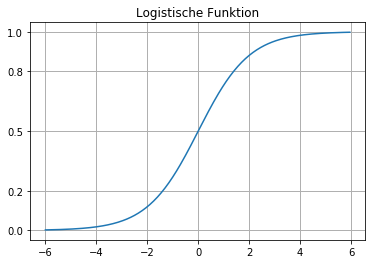

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# logistische Funktion plotten
t = np.arange(-6,6,0.05)
plt.plot(t, logistic(t))
plt.yticks([0, 0.2, 0.5, 0.8, 1])
plt.grid(linewidth=1)
plt.title("Logistische Funktion")
plt.show()

Die logistische Funktion ist als `1 / 1 + e^-z` definiert, wobei *e* die Eulersche Zahl ist (~2,71828...). Diese Zahl ist die Basis des natürlichen Logarithmus.

Es ist zu sehen, dass die Ausgabe der logistischen Funktion zwischen 0 und 1 beschränkt ist. Interessant ist auch, dass bei `z=0`, der Ausgabewert genau `0.5` ist.

Jetzt kann man das `z` in der Formell durch `w0 + w1*x1 + w2*x2 + ... + wn*xn` ersetzen, und so bekommt man das Modell der logistischen Regression. 

Die Anpassung der Gewichtungen *w* ist mathematisch aufwänding und außer der Umfang dieses Blogbeitrags. Stattdessen, wird hier die Implementierung und Anwendung von logistischen Regression gezeigt. 

## Datensatz

Wir werden den [Irisdatensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) hier verwenden, den man mit *scikit-learn* holen kann. Danach werden wir ihn in Trainings- und Testdaten aufteilen.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

# Trainings- und Testdaten erzeugen
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target)

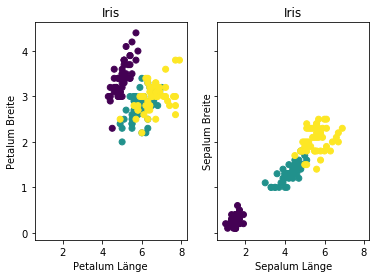

In [4]:
import matplotlib.pyplot as plt

# Datensatz plotten
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax1.set(title="Iris", ylabel='Petalum Breite', xlabel='Petalum Länge')
 
ax2.scatter(data.data[:, 2], data.data[:, 3], c=data.target)
ax2.set(title="Iris", ylabel='Sepalum Breite', xlabel='Sepalum Länge')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

## Implementierung

Man kann ein ganz einfaches Modell mit `sklearn.linear_model.LogisticRegression` erstellen. Nachdem es angepasst wird, kann man die Testdaten klassifizieren und die Genauigkeit bestimmen.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_x, train_y)

# Klassifikationsgüte berechnen
print("Genauigkeit: %f" % accuracy_score(test_y, clf.predict(test_x)))

Genauigkeit: 0.921053


Diese Methode liefert uns aber wenige Erkenntnisse über die Funktionsweise und Anwendung der logistischen Regression. 

Die einfachste Form dieses Modells ist die binäre logistische Regression. Das heißt man kann nur zwischen zwei Klassen unterscheiden. Falls mehrere Klassen vorhanden sind, dann soll man für jede Klasse einen Klassifikator erstellen, der nur überprüfen kann, ob eine Stichprobe zu dieser Klasse gehört oder nicht. `sklearn` macht das implizit, falls `multiclass='ovr'` als Konstruktorparameter eingegeben wird.

`Scikit-learn` enthält viele Optimierungen, die in bestimmten Fällen bessere Genauigkeit und Leistung liefern können. Sie sind aber im Allgemeinen für Fortgeschrittene besser geeignet. Man sollte sich die [Dokumentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) anschauen um mehr darüber zu erfahren. 

## Logistische Regression für Datenanalyse

Eine der Anwendungen des Regressionmodells ist Daten zu Analysieren und die Beziehungen zwischen die unabhängigen und abhängige Variablen zu untersuchen. Das wird Thema dieses Teils des Blogbeitrags. Dafür benötigt man die `pandas` Bibliothek, die Tabellenmanipulation erleichtert, und Tabellen schön darstellt.

Der Datensatz kommt aus dem [General Assembly Datascience Kurs in San Franzisko](https://generalassemb.ly/education/data-science/san-francisco). Die unabhängige Variablen sind Studentenleistungen aus den USA.

[*Link zum Datensatz*](https://github.com/ga-students/sf-dat-21/blob/master/unit-projects/dataset/admissions.csv)


In [6]:
import pandas as pd

df = pd.read_csv("https://github.com/ga-students/sf-dat-21/raw/master/unit-projects/dataset/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### Beschreibung des Datensatzes
- `gre` - *numerisch* - zw. 220 und 800 - Ergebnis auf das standartisierte Test GRE
- `gpa` - *numerisch* - zw. 0.0 und 4.0 - Entspricht etwa einem Notendurchschnitt
- `prestige` - *ordinal-kategorisch* - 1,2,3 oder 4 - Die Prestige der Schule des Bewerbers. 1 ist das höchste
- `admit` - **die abhängige Variable** - 0 bedeutet der Student wurde nicht zugelassen, 1 - der Student wurde zugelassen

Eine andere nützliche Funktion ist `DataFrame.describe()` die Informationen über jede Spalte in der Tabelle liefert.

In [7]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


Eine andere interessante Funktion aus `pandas` ist `pd.crosstab`. Sie bietet die Möglichkeit an, multidimensionale Frequenzanalyse zu machen. Zum Beispiel den Code unten gibt die Anzahl von zugelassenen und nicht zugelassenen Studenten für jede Prestigeklasse.

Eine ähnliche Funktion hat die Histogram. Jede davon zeigt die Anzahl von Stichprobe, die eine bestimmte Wert haben. (Wie viele Studenten mit `gpa` von 3,5 z.B)

In [8]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


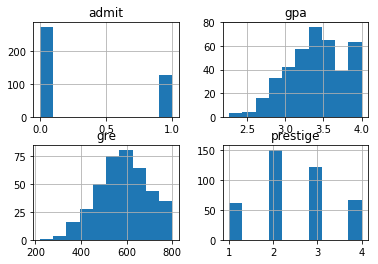

In [9]:
df.hist()
plt.show()

Das Merkmal *prestige* ist wie gesagt ordinal-kategorisch. Das bedeutet, dass man kann die Werte vergleichen kann. 1 ist besser als 2, und 2 ist besser als 3, trotzdem kann man den Unterschied nicht quantitativ bestimmen. Umm besser die Beziehungen zum abhängigen Variable besser bestimmen zu können, wäre es sinnvoller das Merkmal als mehrere Dummy-Variablen zu kodieren. Die Funktion `pd.get_dummies` erleichtert dieses Prozess. 

In [10]:
dummies = pd.get_dummies(df['prestige'], prefix='prestige')
dummies.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [38]:
# saubere Tabelle erstellen nur mit den Merkmalen den wir brauchen
data = df[['admit', 'gpa', 'gre']].join(dummies.loc[:, 'prestige_2.0':])

# sklearn sagt später, dass es  NaN (Not a Number) in der Tabelle vorkommen
# deswegen entfernen wir alle Zeilen, wo eine NaN liegt 
data = data.dropna(axis=0, how='any')
data.head()

,admit,gpa,gre,prestige_2.0,prestige_3.0,prestige_4.0
0,0,3.61,380.0,0,1,0
1,1,3.67,660.0,0,1,0
2,1,4.00,800.0,0,0,0
3,1,3.19,640.0,0,0,1
4,0,2.93,520.0,0,0,1


Es ist zu bemerken, dass *prestige_1* nicht in der Tabelle liegt. Wir wollen es als Grundlinie für die Analyse benutzen und berücksichtigen es nicht bei der Anpassung des Modells. Der Grund dafür ist die [Multikollinearität](https://de.wikipedia.org/wiki/Multikollinearit%C3%A4t), die bei Verwendung mehrerer Variablen enstehen kann, die in starker Korrelation miteinander sind. Die Konsequenz davon ist, dass man die Analyse der Regressionskoeffiziente dann ungenau ist.

In [60]:
clf = LogisticRegression()

# Tabelle zu numpy Array konvertieren und dann vom Spaltenvektor
# ins 1d-Array umwandeln
clf.fit(data.loc[:, 'gpa':], np.array(data[['admit']]).ravel())

# Analyse von Koeffizienten und Chancen
coef = pd.DataFrame({'features': data.columns[1:], 'coef': clf.coef_[0], 'odds_ratio': np.exp(clf.coef_[0])})
coef[['features', 'coef', 'odds_ratio']]

,features,coef,odds_ratio
0,gpa,0.232295,1.261491
1,gre,0.001785,1.001787
2,prestige_2.0,-0.603475,0.546908
3,prestige_3.0,-1.172150,0.309701
4,prestige_4.0,-1.377298,0.252259


Wir haben das Modell angepasst und analysieren die Koeffizienten. In der Spalte *coef* befinden sich die Gewichtungen des Modells. Es ist zu sehen, dass es eine Starke negative Abhängigkeit gibt, falls der Stundent sich in Prestigegruppe 4 befindet. 

In der Spalte *odds_ratio* sieht man wie sich die Zulassungschancen verändern, für die Veränderung des Merkmals um 1 Einheit. Zum Beispiel falls die Schule des Bewerbers prestige 2 hat, sind die Zulassungschancen um 50% niedriger.

### Schlussfolgerung
Die logistische Regression ist ein ausgezeichneter Classifikationsalgorithmus, den man auch für detaillierte Analyse verwenden kann. Der Algorithmus ist nicht so leistungsfähig wie z.B Support Vector Machines, aber dafür liefert er wichtige Einsichten über Zusammenhänge im Datensatz.

## Resourssen

- Git Repository mit dem kompletten Code - [Link](https://github.com/emomicrowave/machine-learning-tutorials/blob/master/04-logistic_regression/tutorial.ipynb)
- detaillierteres Tutorial über Regressionsanalye - [Link](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html) 